In [101]:
'Ejercicio 1'

def p(n):
    return 2*n*sin(3.1415934/n)

p(6)/2

3.00000064641018

In [57]:
'Ejercicio 2'

def S(x):
    if x==6:
        return 1/2;
    return sqrt(T(x)*S(x/2)/2)

def T(x):
    if x == 6:
        return 1/sqrt(3);
    return 1/(1/T(x/2) + 1/S(x/2))

def comprobar(n0):
    n=6
    resta = T(n) - S(n)
    while resta >= 10^-n0:
        n = n*2
        resta = T(n) - S(n)
    return n

x = comprobar(3)
show (x)
show(S(x).n())


48

0.0654031292301431

In [70]:
'Ejercicio 3'

def euler1(n, pre):
    p = n(pi, prec=pre)
    p = p / 4
    suma = 0
    for x in xsrange(n):
        suma = suma + ((-1)^x)/(2*x+1)
        if suma == p:
            return x
    return -1

def euler2(n,pre):
    p = n(pi, prec = pre)
    p = p/4
    asuma = 0
    bsuma = 0
    a = 1/2
    b = 1/3
    for x in xsrange(n):
        asuma = asuma + ((-1)^x)*(a^(2*x+1))/(2*x+1)
        bsuma = bsuma + ((-1)^x)*(b^(2*x+1))/(2*x+1)
        if (asuma + bsuma) == p:
            return x
    return -1

pre = 18
n = 100000

show(euler1)
show(euler2)

'Lucía'

'''Esta funcion no la uso para nada, solo para saber como funcionaba
el bucle que imitaba la serie'''
def arct(x, sup):
    suma = 0
    for i in srange(0, sup+1):
        suma = suma + (-1)^i * x^(2*i + 1) / (2*i + 1)
    return suma

'''Busco funcion tal que:
   Dada precision 'prec', halle hasta que punto hay que desarrollar la serie 
   (hasta qué 'i' del sumatorio)
   (sin pasarse del limite i = sup, donde sup es un argumento de entrada)
   para alcanzar pi con esa precision para cada metodo'''
def eficiencia_normal(prec, sup):
    p = n(pi, prec = prec)
    p = p/4
    suma = 0
    x = 1
    for i in srange(0, sup+1):
        suma = suma + (-1)^i * x^(2*i + 1) / (2*i + 1)
        if p == suma:
            return i
    return -1

def eficiencia_suma(prec, sup):
    p = n(pi, prec = prec)
    p = p/4
    asuma = 0
    bsuma = 0
    a = 1/2
    b = 1/3
    for i in srange(0, sup+1):
        asuma = asuma + (-1)^i *a^(2*i + 1) / (2*i + 1)
        bsuma = bsuma + (-1)^i *b^(2*i + 1) / (2*i + 1)
        if p == (asuma + bsuma):
            return i
    return -1
pr = 18
su = 100000
show(eficiencia_suma(pr, su))
show(eficiencia_normal(pr, su))
show(p = n(pi, prec = pr))


Lsuma = []
Lnormal = []
sup = 10000000
for prec in srange(2, 20):
    Lsuma.append((prec, eficiencia_suma(prec, sup)))
    Lnormal.append((prec, eficiencia_normal(prec, sup)))
show(line2d(Lsuma))
show(line2d(Lnormal))



<function euler1 at 0x7f231e4f8668>

<function euler2 at 0x7f231e4f8b18>

In [76]:
'Ejercicio 4'

def Suma(N):
    sumaparc = 0
    y = 0
    for x in srange(0,N):
        y = (((factorial(2*x))^3)*(42*x+5))/(((factorial(x))^6)*(16^(3*x+1)))
        sumaparc = sumaparc + y
    return sumaparc

(1/Suma(100)).N()



3.14159265358979

Algoritmo de Ramanujan:

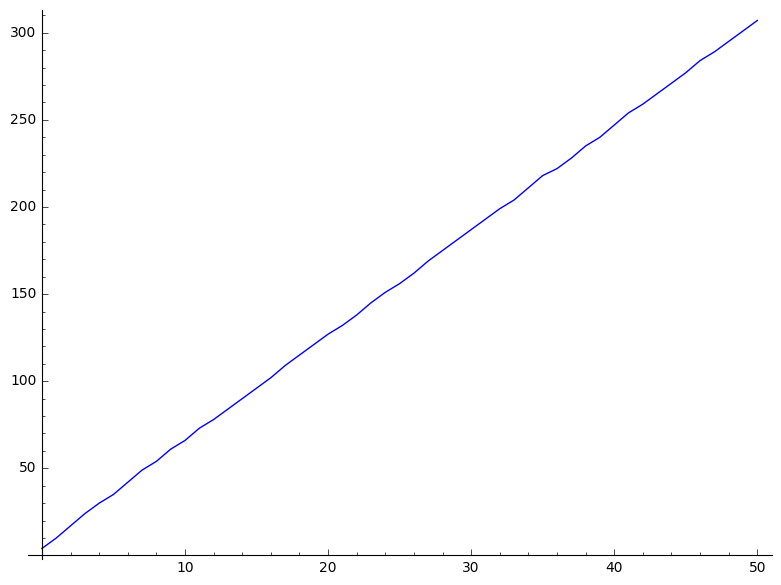

In [81]:
def Suma(N):
    sumaparc = 0
    y = 0
    for x in srange(0,N):
        y = (((factorial(2*x))^3)*(42*x+5))/(((factorial(x))^6)*(16^(3*x+1)))
        sumaparc = sumaparc + y
    return sumaparc

'Lucía' 

'sup_2 es la máxima precisión que vamos a comprobar si el falso pi devuelto por la serie tiene'

def precision_vs_n(sup1, sup2):
    L = []
    precision_anterior = 1
    
    '''Que falso-pi obtenemos al aniadir cada sumando?'''
    suma = 0
    for i in srange(0, sup1+1):
        a = 2*i
        a = (factorial(a))^3
        a = a * (42*i + 5)
        a = a / (factorial(i)^6)
        a = a / (16^(3*i + 1))
        suma = suma + a
        
        '''Cuanta precision tenemos?
        (para optimizar: es, como minimo, la que teniamos antes)'''
        j = sup2
        p = N(pi, prec = j)
        while(j > precision_anterior and p != 1/suma):
            p = N(pi, prec = j)
            if(p == 1/suma):
                L.append((i, j))
                precision_anterior = j
            j = j - 1
    return L

sup1 = 50
sup2 = 320
grafica =  precision_vs_n(sup1, sup2)
show(line2d(grafica))

In [ ]:
NR = RealField(prec=200)

for x in srange (1, 100):
    show(NR((1/Suma(x)).n()))

Ejercicio 5: Implementa el algoritmo de Salamin y Brent y compara su eficiencia con la del método basado en la serie de Ramanujan.

In [97]:
'Ejercicio 5'

def a(n):
    if n == 0:
        return 1
    return (a(n-1)+b(n-1))/2

def b(n):
    if n == 0:
        return sqrt(2)/2
    return sqrt(a(n-1)*b(n-1))

def c(n):
    return (a(n)^2) - (b(n)^2)

def s(n):
    if n == 0:
        return 1/2
    return s(n-1)-((2^n)*c(n))

def p(n):
    return (2*a(n)^2)/s(n)

In [ ]:
'miramos que n da la misma precision dependiendo del método empleado'

def comp(n):
    x = p(n).n(prec = 50)
    for i in xsrange(n, 1000):
        y = Suma(i).n(prec = 50)
        if y == x:
            return i
    return i
n = 5
m = comp(n)
%time p(n)
%time Suma(m)

3.14159265358979341640325639302753263808231600628736843194970136154371783988580870624348392159887241280199360142823336844806340470169918832827729212843345468746309930841577753783416266293956237442588292555929032291718850106212986753208982525617552368617316631138732942236757566279471451947041740862987

(3.1, 2)

(3.14, 2)

(3.142, 2)

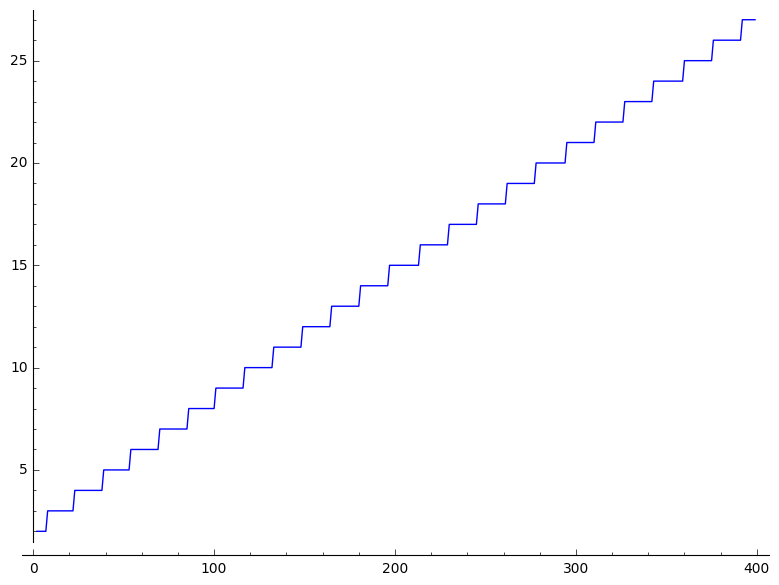

[m == 0.062309330782291485, n == 2.1778334498183156]

In [16]:
'Ejercicio 6'

forget()

def F(m):
    A = 545140134
    B = 13591409
    C = 640320
    return ((-1)^m * (factorial(6 * m)) * (A * m+B))/(factorial(3 * m) * (factorial(m)^3) * (C^(3*m)))
def pi_chud(ndigits):
    k=0
    S=0
    while 1:
        S += F(k)
        if floor(abs(10^ndigits * F(k))) == 0:
            break
        k += 1
    return (426880 * sqrt(10005).n(digits=ndigits))/S,k

def sumita(n):
    suma = 0 
    for i in xsrange(0,n+1):
        suma = suma + F(i).n()
    return suma

def a(x):
    return a(x-1)*((-1)*6*x*(6*x-2)*(6*x-3)*(6*x-4)*(6*x-5))/((640320^3)*(x^3)*3*x*(3*x-1)*(3*x-2))

show(((426880 * sqrt(10005))/sumita(1000)).n(prec=1000))

'Lucía again'

def denominador(d):
    '''Constantes'''
    A = 545140134
    B = 13591409
    '''Sumas que acumulo en el bucle'''
    s1 = 0
    s2 = 0
    denominador = B
    '''Valores iniciales de las sumas a y b (para n = 0)'''
    a = 1
    b = 0
    n = 1
    while floor(abs(10^d * (B*a + A*b))) != 0:
        cte = (-1)*(6*n)*(6*n - 2)*(6*n - 3)*(6*n - 4)*(6*n - 5)/((640320*n)^3*(3*n)*(3*n - 1)*(3*n - 2))
        a = a * cte
        b = a * n
        denominador = denominador + (B*a + A*b)
        n += 1
    return denominador, n

def pi_ch(d):
    den = denominador(d)
    return 426880*sqrt(10005).n(digits = d)/den[0], den[1]
        
L=[]
for  i in srange(2,5):
    show(pi_ch(i))
    
for i in srange(2, 400):
    L.append((i, pi_ch(i)[1]))
    
show(line2d(L))

var('x m n')
model(x) = m * x + n
find_fit(L, model)


(3.1, 8)

(3.14, 11)

(3.142, 14)

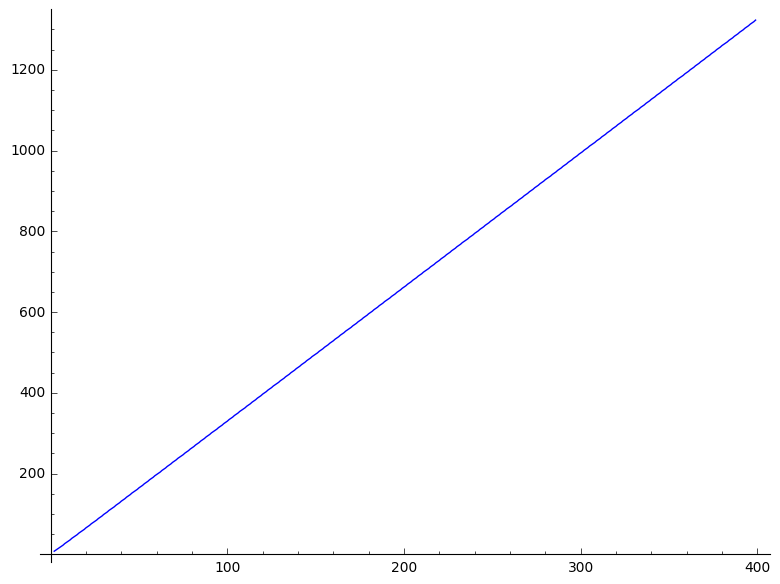

[m == 3.316637257236838, n == -1.0887851503542985]

In [35]:
'Ejercicio 7'

def RyW(x):
    suma = 0
    for n in xsrange(x):
        num = ((factorial(n)^2)*2^(n+1))
        den = (factorial(2*n+1))
        suma += (num/den).n(prec=10)
    return suma

def pi_rw(d):
    serie = 2
    s = 2
    n = 1
    while floor(abs(s*10^d)) != 0:
        relacion = 2*n^2/((2*n + 1)*(2*n))
        s = s * relacion
        serie = serie + s
        n += 1
    return serie.n(digits = d), n


for i in srange(2, 5):
    show(pi_rw(i))
    
L=[]    
for i in srange(2, 400):
    L.append((i, pi_rw(i)[1]))
    
show(line2d(L))

var('x m n')
model(x) = m * x + n
find_fit(L, model)



In [ ]:
'Ejercicio 8 peta'

def F0(j,m):
    ' Sumandos con m-k no negativo '
    S = RR(0.0)
    k =0
    while k <= m:
        r = k
        S+=RR(power_mod(2,n-k,r)/r)-floor(RR(power_mod(2,n-k,r)/r))
        k += 1
    return RR(S)

def F1(j,m):
    ' Resto de los sumandos '
    S =RR(0.0)
    k =m+1
    while 1:
        r = k
        nS = S + RR(2^(m-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S(j,m):
    return RR(F0(j,m)+F1(j,m))

def cifra_log(n):
    n -= 1
    x = (4 * RR(S(1,n))-2 * RR(S(4,n))-RR(S(5,n))-RR(S(6,n)))
    return (x-floor(x)).str(base=2)
cifra_log(4)

In [ ]:
'Ejercicio 9  no sé xq no funciona SIIIII YA FUNCIONA IUJUU'

def find_rat():
    resta = 10000
    NR = RealField(prec=100)
    numdef = 0
    dendef = 0
    den = 1
    for den in xsrange(1, 9999):
        num = 1
        while num/den < 3.15:
            if abs(NR(num/den) - NR(pi)) < resta:
                resta = abs(NR(num/den) - NR(pi))
                numdef = num
                dendef = den
            num += 1
    return numdef, dendef

a,b = find_rat()
print(a,b)


In [83]:
forget()

'Ejercicio 10 2'

def frac(n,m):
    L=[]
    while (n/m) > 1:
        a = n//m
        L.append(a)
        b = n%m
        n,m = m,b
        if m == 0:
            break
    L.append(m)
    return L
L1 = frac(55,43)
show(L1)
    

[1, 3, 1, 1, 2, 2, 0]

In [85]:
solve?

In [97]:
'Ejercicio 14 -> bisección'

def subint(f,a,b):
    m = (a+b)/2
    if(f(m)*f(a)) < 0:
        return a,m
    return m,b

def iterador(f,a,b,E):
    while abs(f(a)-f(b)) >= E:
        a,b = subint(f,a,b)
    return a,b    

f(x) = x -2

c,d = iterador(f, -1,4, .000000000000000001)
show(c.n(prec=1000))
show(d.n(prec=1000))

1.99999999999999999956631913100579822639701887965202331542968750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

2.00000000000000000010842021724855044340074528008699417114257812500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

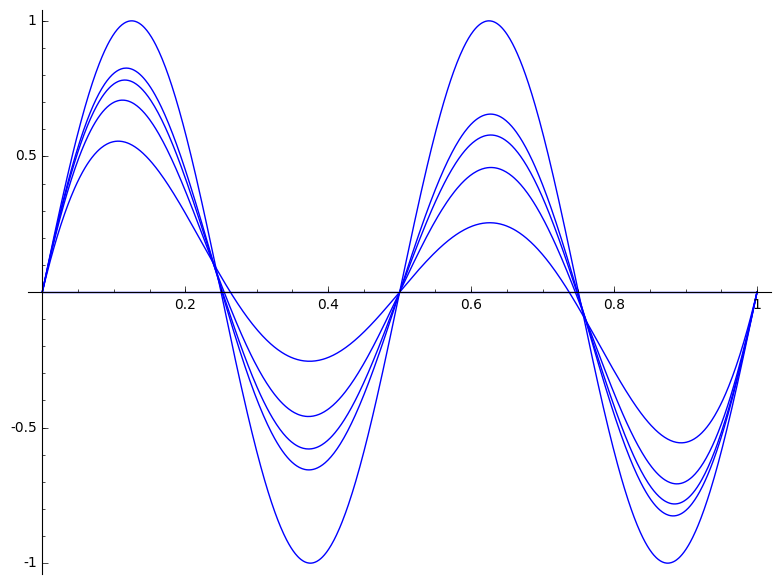

In [134]:
'Ejercicio 16'
def Ber(n,f):
    suma = 0
    for i in xsrange(0,n+1):
        a = binomial(n,i)
        b = f(i/n)
        c = (1-x)^(n-i)*x^i
        suma = suma + a*b*c
    return suma
f(x) = sin(4*pi*x)
L = []
L.append(plot(f, (0, 1)))
for i in srange(4, 49, 10):
    L.append(plot(Ber(i, f), (0, 1)))
show(sum(L))

In [ ]:
'Ejercicio 17'

forget()

def e1(n):
    return (1+1/n)^n
    

def e2(sup):
    s = 0
    for i in srange(0, sup+1):
        s += 1/factorial(i)
    return s

def e3(sup):
    if sup < 3:
        return -1
    l = sup^sup
    l = l/((sup - 1)^(sup - 1))
    l = l - (((sup - 1)^(sup - 1))/((sup - 2)^(sup - 2)))
    return l

In [157]:
'Ejercicio 18'
forget()

def sumat(sup):
    NR = RealField(prec = 3000)
    suma = 0
    for i in xsrange(1, sup+1):
        num = floor(i*tanh(NR(pi)))
        den = 10^i
        suma = suma + num/den
    return suma

x = (1/81).n(digits=266)
y = sumat(1000).n(digits=266)
show(x)
show(y)
if abs(x - y) == 0:
    print("Olé")

0.012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012346

0.012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012345679012346

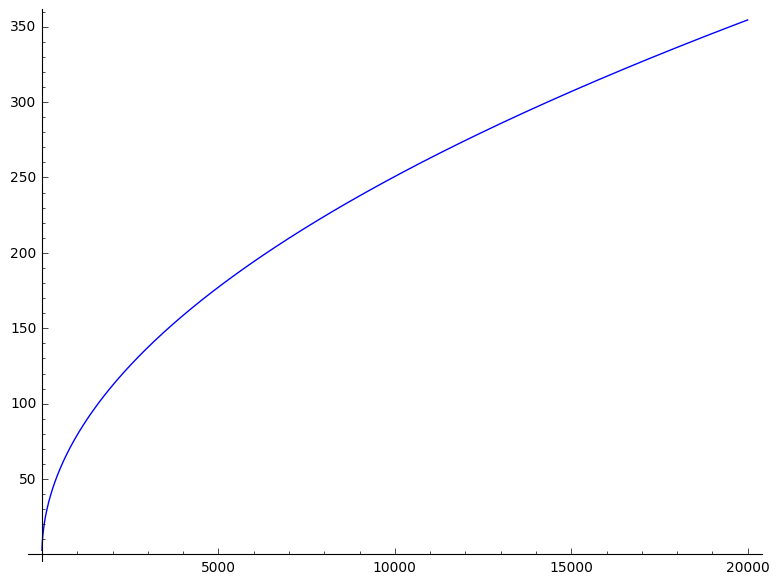

In [167]:
'Ejercicio 19'

def Fun(n):
    return factorial(n)/((n^n)*exp(-n)).n(digits=200)
L = []
for i in xsrange(1, 20000):
    L.append((i,Fun(i)))
line(L)


In [168]:
var('m n')
model(x) = m* x^n
find_fit(L, model)

[m == 2.5070419005662403, n == 0.49998333955882057]

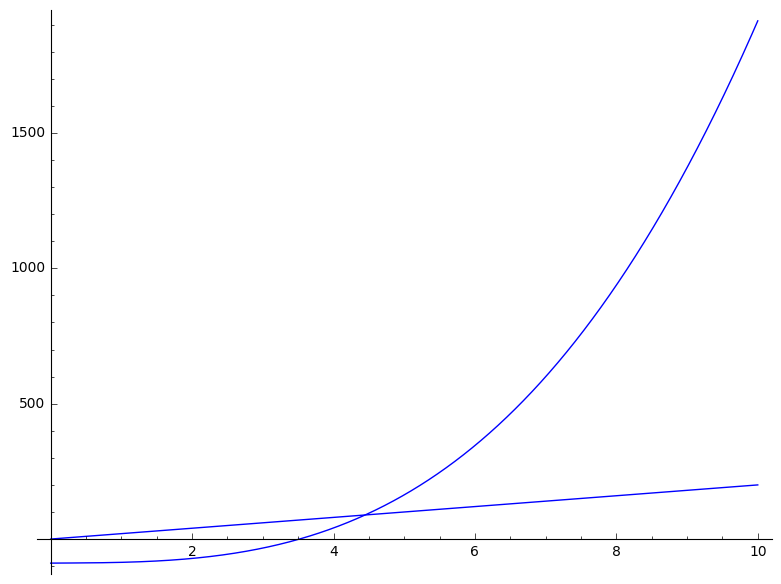

In [127]:
f(x) = 2*x^3+x^(1/2) -89;
g(x) = 20*x
p = plot(f, 0,10)
t = plot(g, 0, 10)
p+t
